In [1]:
from S2S_on_SFNO.Models.losses import L2Sphere, L2Sphere_noSine, CosineMSELoss
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loss = L2Sphere()
lossn = L2Sphere(reduction='none')
loss_noSine = L2Sphere_noSine(reduction='mean')
loss_noSinen = L2Sphere_noSine(reduction='none')
cos = CosineMSELoss(reduction='mean',eps=0)
cossum = CosineMSELoss(reduction='sum',eps=0)
cosn = CosineMSELoss(reduction='none',eps=0)

def l2loss_sphere(solver, prd, tar, relative=False, squared=True):
    loss = solver.integrate_grid((prd - tar)**2, dimensionless=True).sum(dim=-1)
    if relative:
        loss = loss / solver.integrate_grid(tar**2, dimensionless=True).sum(dim=-1)
    
    if not squared:
        loss = torch.sqrt(loss)
    loss = loss.mean()

    return loss

In [3]:
mse = torch.nn.MSELoss()

In [4]:
ones = torch.ones((1,1,721,1440))
twos = ones*2
zeros = torch.zeros((1,1,721,1440))
y = np.abs(np.sin(np.linspace(-torch.pi / 2, torch.pi / 2, 721)))
onlySine = np.cos(np.linspace(-torch.pi / 2, torch.pi / 2, 721))
y = np.repeat(y[:, np.newaxis], 1440, axis=1)[None][None]
y.shape


(1, 1, 721, 1440)

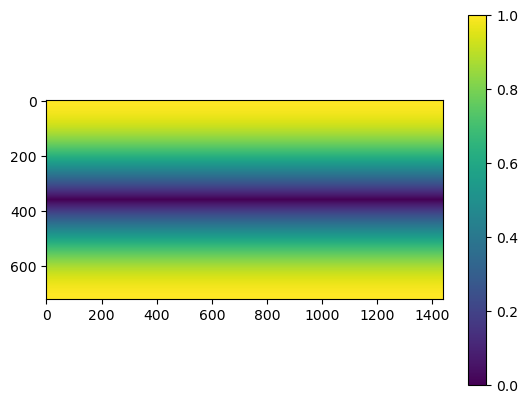

In [5]:
plt.imshow(y[0,0])
plt.colorbar()

In [46]:
print(mse(ones,ones*2))
print(loss(ones,ones*200))
print(loss_noSine(ones,ones*2))
print(cos(ones,ones*40))
print(cossum(ones,ones*2))

tensor(1.)
tensor(0.9950)
tensor(0.5000)
tensor(2.1096)
tensor(1.)


In [49]:
print(mse(ones,ones+y))
print("sphere :",loss(ones,ones+y))
print("noSine :",loss_noSine(ones,ones+y))
print(cos(ones,ones+y))
print(cossum(ones,ones+y))

tensor(0.5007, dtype=torch.float64)
sphere : tensor(0.3453, dtype=torch.float64)
noSine : tensor(0.3783, dtype=torch.float64)
tensor(0.0005, dtype=torch.float64)
tensor(0.3333, dtype=torch.float64)


tensor(0.5000)

tensor(2.1096)

tensor(1.0000)

In [11]:
l2loss_sphere(ones,ones*60)

TypeError: l2loss_sphere() missing 1 required positional argument: 'tar'

In [ ]:
np.sqrt(mse(ones,ones*60))

In [12]:
# print(np.sqrt(mse(zeros+0.1,y+0.1)))
print(loss(zeros+0.1,y+1.1))
print(loss_noSine(zeros+0.1,y+1.1))

tensor(0.9364, dtype=torch.float64)
tensor(0.9396, dtype=torch.float64)


In [5]:
rm = []
l = []
ls = []
c = []
cs = []
for i in np.linspace(1,40,41):
    rm.append(torch.sqrt(mse(ones*i,ones)))
    l.append(loss(ones*i,ones))
    ls.append(loss_noSine(ones*i,ones))
    c.append(cos(ones*i,ones))
    
    # cs.append(cossum(ones,ones*i))

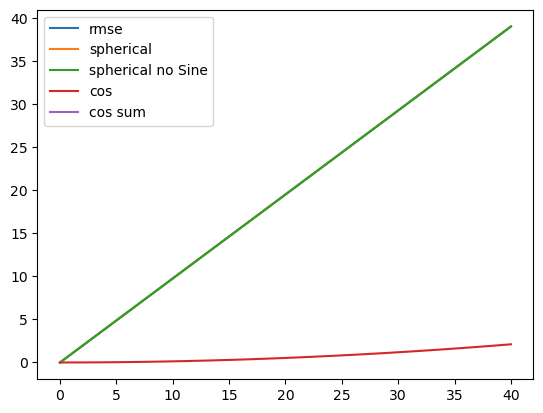

In [7]:
plt.plot(rm,label='rmse')
plt.plot(l,label='spherical')
plt.plot(ls,label='spherical no Sine')
plt.plot(c,label='cos')
plt.plot(cs,label='cos sum')
plt.legend()

In [8]:
rm = []
l = []
ls = []
c = []
cs = []
wSs = []
x = torch.rand(721,1440)[None][None] + ones
for i in np.linspace(1,1000,81):
    rm.append(torch.sqrt(mse(ones+y*i,ones)))
    l.append(loss(ones+y*i,ones))
    lossS = loss_noSine(ones+y*i,ones)
    ls.append(lossS)
    c.append(cos(ones,ones+y*i))
    
    # cs.append(cossum(ones,ones*i))

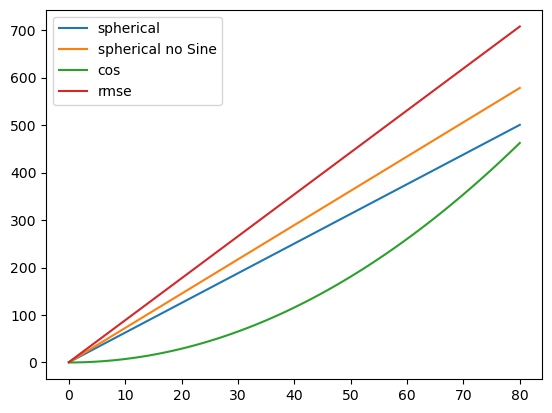

In [11]:
plt.plot(l,label='spherical')
plt.plot(ls,label='spherical no Sine')
plt.plot(c,label='cos')
# plt.plot(cs,label='cos sum')
plt.plot(rm,label='rmse')
plt.legend()
# plt.xlim(0,5)
# plt.ylim(0,3)

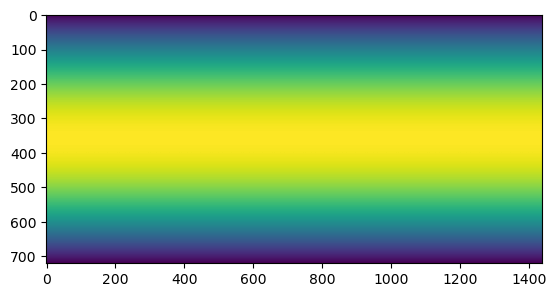

In [15]:
plt.imshow((wSs[0]*torch.ones((1,1,721,1440)))[0,0])

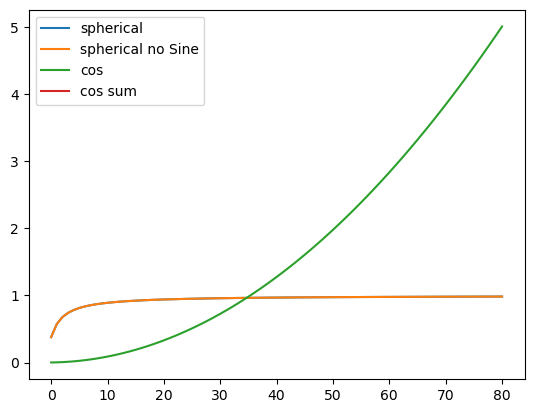

In [40]:
plt.plot(l,label='spherical')
plt.plot(ls,label='spherical no Sine')
plt.plot(c,label='cos')
plt.plot(cs,label='cos sum')
plt.legend()
# plt.plot(rm,label='rmse')
# plt.xlim(0,5)
# plt.ylim(0,3)

In [ ]:
rm = []
l = []
ls = []
c = []
cs = []
for i in np.linspace(1,4,41):
    
    rm.append(torch.sqrt(mse(ones,x*i)))
    l.append(loss(ones,ones*i))
    ls.append(loss_noSine(ones,ones*i))
    c.append(cos(ones,ones*i))
    
    # cs.append(cossum(ones,ones*i))

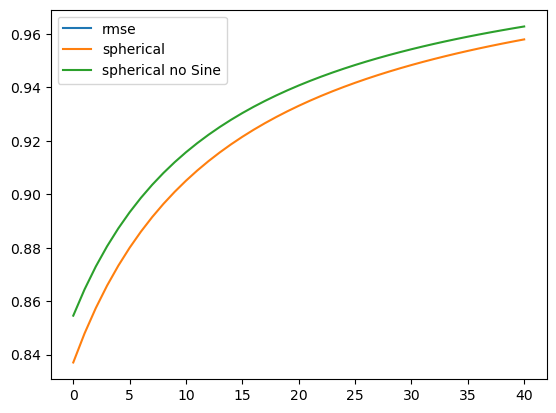

In [22]:
rm = []
l = []
ls = []
for i in np.linspace(1,4,41):
    # rm.append(torch.sqrt(mse(zeros+0.1,y*i)))
    l.append(loss(zeros+0.1,y*i))
    ls.append(loss_noSine(zeros+0.1,y*i))
plt.plot(rm,label='rmse')
plt.plot(l,label='spherical')
plt.plot(ls,label='spherical no Sine')
plt.legend()

In [19]:
x = lossn(ones,twos)
xs = loss_noSinen(ones,twos)
xc = cosn(ones,twos)

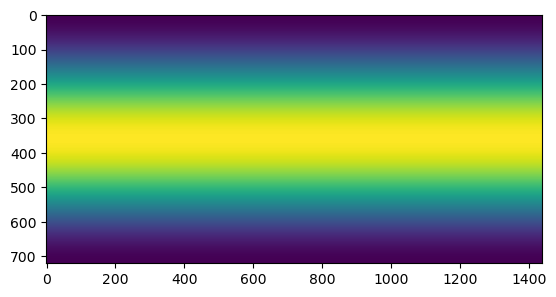

In [64]:
plt.imshow(x[0,0])

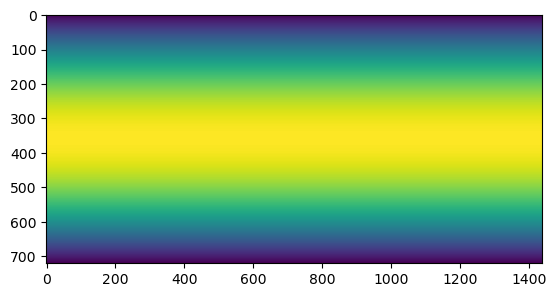

In [65]:
plt.imshow(xs[0,0])

In [20]:
xs[0,0,0:10,0]

tensor([1.2374e-09, 2.8805e-09, 4.5259e-09, 6.1715e-09, 7.8170e-09, 9.4623e-09,
        1.1107e-08, 1.2752e-08, 1.4397e-08, 1.6042e-08])

In [21]:
xs[0,0,-10:,0]

tensor([1.6042e-08, 1.4397e-08, 1.2752e-08, 1.1107e-08, 9.4623e-09, 7.8170e-09,
        6.1715e-09, 4.5259e-09, 2.8805e-09, 1.2374e-09])

In [22]:
x[0,0,0:10,0]

tensor([6.8941e-17, 1.6019e-11, 5.0339e-11, 1.0296e-10, 1.7388e-10, 2.6310e-10,
        3.7059e-10, 4.9637e-10, 6.4041e-10, 8.0271e-10])

In [23]:
xc[0,0,0:10,0]

tensor([0.0000e+00, 9.5191e-06, 1.9038e-05, 2.8557e-05, 3.8075e-05, 4.7593e-05,
        5.7109e-05, 6.6625e-05, 7.6139e-05, 8.5652e-05])

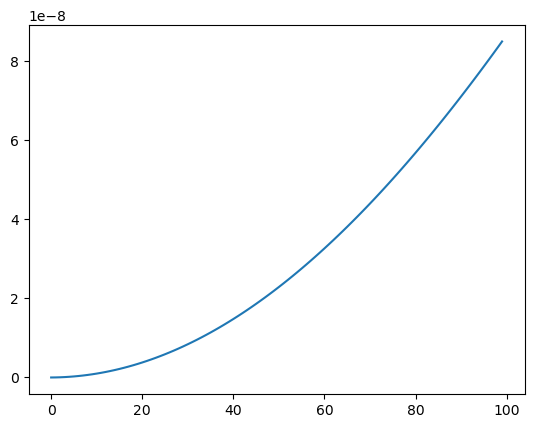

In [15]:
plt.plot(x[0,0,0:100,0])

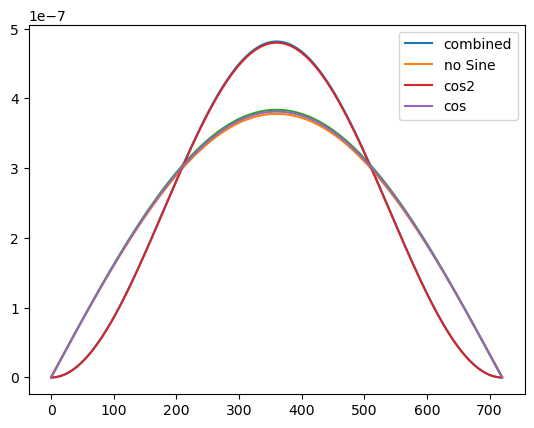

In [24]:
x_y = x[0,0,:,0]
plt.plot(x_y,label="combined")
xs_y = xs[0,0,:,0]
plt.plot(xs_y,label="no Sine")
plt.plot(onlySine*3.838e-7)
plt.plot(onlySine*onlySine*4.8e-7,label='cos2')
xc_y = xc[0,0,:,0]
plt.plot(xc_y*1.7474e-4,label='cos')
plt.legend()

In [39]:
xc_y[2]

tensor(1.9038e-05)

In [62]:
(xc_y*1.735e-4 - xs_y).mean()

tensor(-1.5411e-10)

In [90]:
np.sin(np.pi/2)

1.0

In [42]:
def f(x,a):
    return a*xc_y[x]
def f2(x,a):
    return a*xc_y[x]*xc_y[x]

In [23]:
import scipy

In [40]:
scipy.optimize.curve_fit(f, list(range(721)), xs_y, p0=1.75e-4 )

/home/scratch_local/gkd965-419777/tmp/ipykernel_4031696/465133491.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  scipy.optimize.curve_fit(f, list(range(721)), xs_y, p0=1.75e-4 )


(array([0.00017474]), array([[inf]]))

In [43]:
scipy.optimize.curve_fit(f2, list(range(721)), x_y, p0=3.8e-7 )

/home/scratch_local/gkd965-419777/tmp/ipykernel_4031696/2934917452.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  scipy.optimize.curve_fit(f2, list(range(721)), x_y, p0=3.8e-7 )


(array([3.838e-05]), array([[inf]]))

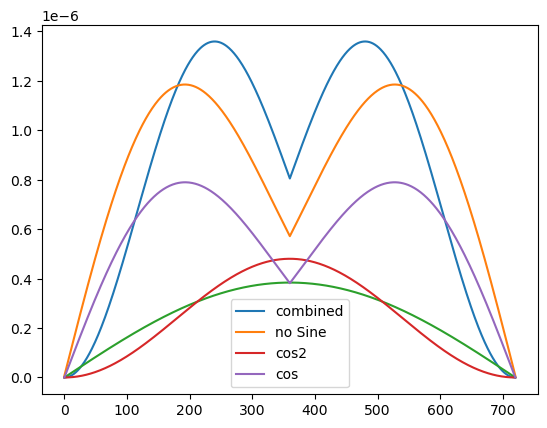

In [71]:
x = lossn(zeros+0.1,torch.tensor(y)+1.1)
xs = loss_noSinen(zeros+0.1,torch.tensor(y)+1.1)
xc = cosn(zeros+0.1,torch.tensor(y)+1.1)

x_y = x[0,0,:,0]
plt.plot(x_y,label="combined")
xs_y = xs[0,0,:,0]
plt.plot(xs_y,label="no Sine")
plt.plot(onlySine*3.838e-7)
plt.plot(onlySine*onlySine*4.8e-7,label='cos2')
xc_y = xc[0,0,:,0]
plt.plot(xc_y*1.7474e-4,label='cos')
plt.legend()

In [70]:
print((zeros+0.1).shape)
print((y+1.1).shape)

torch.Size([1, 1, 721, 1440])
(1, 1, 721, 1440)


In [74]:
import torch_harmonics as harmonics
w_quad = torch.tensor(harmonics.quadrature.legendre_gauss_weights(721, -1, 1)[1])

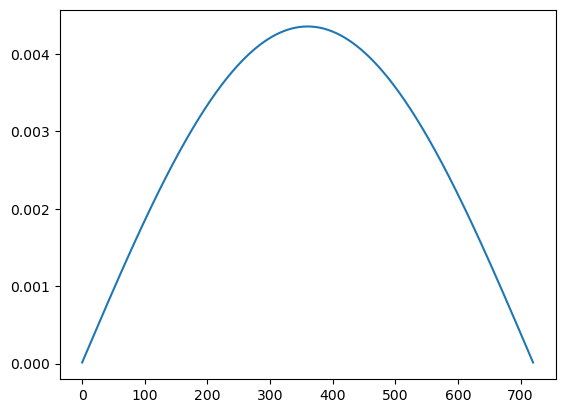

In [77]:
plt.plot(w_quad)

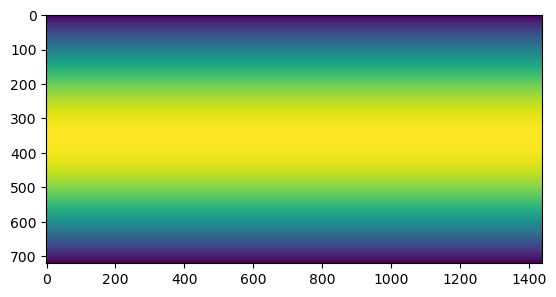

In [79]:
plt.imshow((w_quad[None,:,None]*np.ones((1,721,1440)))[0])

In [47]:
x.sum()

tensor(0.2500)

In [49]:
xs[0,0,:,0:100].sum()

tensor(0.0174)

In [48]:
xs.sum()

tensor(0.2500)

In [46]:
# onlySine.sum()

In [50]:
5/4

1.25

In [57]:
torch.cos(torch.arange(-90, 90, step=0.25) * (2 * torch.pi / 360))

tensor([-4.3711e-08,  4.3634e-03,  8.7266e-03,  1.3090e-02,  1.7452e-02,
         2.1815e-02,  2.6177e-02,  3.0539e-02,  3.4899e-02,  3.9260e-02,
         4.3619e-02,  4.7978e-02,  5.2336e-02,  5.6693e-02,  6.1049e-02,
         6.5403e-02,  6.9757e-02,  7.4109e-02,  7.8459e-02,  8.2808e-02,
         8.7156e-02,  9.1502e-02,  9.5846e-02,  1.0019e-01,  1.0453e-01,
         1.0887e-01,  1.1320e-01,  1.1754e-01,  1.2187e-01,  1.2620e-01,
         1.3053e-01,  1.3485e-01,  1.3917e-01,  1.4349e-01,  1.4781e-01,
         1.5212e-01,  1.5643e-01,  1.6074e-01,  1.6505e-01,  1.6935e-01,
         1.7365e-01,  1.7794e-01,  1.8224e-01,  1.8652e-01,  1.9081e-01,
         1.9509e-01,  1.9937e-01,  2.0364e-01,  2.0791e-01,  2.1218e-01,
         2.1644e-01,  2.2070e-01,  2.2495e-01,  2.2920e-01,  2.3345e-01,
         2.3769e-01,  2.4192e-01,  2.4615e-01,  2.5038e-01,  2.5460e-01,
         2.5882e-01,  2.6303e-01,  2.6724e-01,  2.7144e-01,  2.7564e-01,
         2.7983e-01,  2.8402e-01,  2.8820e-01,  2.9

In [56]:
torch.arange(-90, 90, step=0.25).size()

torch.Size([720])

In [61]:
co = torch.cos(torch.linspace(-torch.pi / 2, torch.pi / 2, 721))

In [70]:
con = co/co.sum()

In [64]:
torch.abs(co)

tensor([4.3711e-08, 4.3632e-03, 8.7264e-03, 1.3090e-02, 1.7452e-02, 2.1815e-02,
        2.6177e-02, 3.0538e-02, 3.4899e-02, 3.9260e-02, 4.3619e-02, 4.7978e-02,
        5.2336e-02, 5.6693e-02, 6.1049e-02, 6.5403e-02, 6.9756e-02, 7.4109e-02,
        7.8459e-02, 8.2808e-02, 8.7156e-02, 9.1502e-02, 9.5846e-02, 1.0019e-01,
        1.0453e-01, 1.0887e-01, 1.1320e-01, 1.1754e-01, 1.2187e-01, 1.2620e-01,
        1.3053e-01, 1.3485e-01, 1.3917e-01, 1.4349e-01, 1.4781e-01, 1.5212e-01,
        1.5643e-01, 1.6074e-01, 1.6505e-01, 1.6935e-01, 1.7365e-01, 1.7794e-01,
        1.8224e-01, 1.8652e-01, 1.9081e-01, 1.9509e-01, 1.9937e-01, 2.0364e-01,
        2.0791e-01, 2.1218e-01, 2.1644e-01, 2.2070e-01, 2.2495e-01, 2.2920e-01,
        2.3345e-01, 2.3769e-01, 2.4192e-01, 2.4615e-01, 2.5038e-01, 2.5460e-01,
        2.5882e-01, 2.6303e-01, 2.6724e-01, 2.7144e-01, 2.7564e-01, 2.7983e-01,
        2.8402e-01, 2.8820e-01, 2.9237e-01, 2.9654e-01, 3.0071e-01, 3.0486e-01,
        3.0902e-01, 3.1316e-01, 3.1730e-

In [63]:
torch.clamp(co, min=0.0)

tensor([0.0000, 0.0044, 0.0087, 0.0131, 0.0175, 0.0218, 0.0262, 0.0305, 0.0349,
        0.0393, 0.0436, 0.0480, 0.0523, 0.0567, 0.0610, 0.0654, 0.0698, 0.0741,
        0.0785, 0.0828, 0.0872, 0.0915, 0.0958, 0.1002, 0.1045, 0.1089, 0.1132,
        0.1175, 0.1219, 0.1262, 0.1305, 0.1349, 0.1392, 0.1435, 0.1478, 0.1521,
        0.1564, 0.1607, 0.1650, 0.1693, 0.1736, 0.1779, 0.1822, 0.1865, 0.1908,
        0.1951, 0.1994, 0.2036, 0.2079, 0.2122, 0.2164, 0.2207, 0.2250, 0.2292,
        0.2334, 0.2377, 0.2419, 0.2462, 0.2504, 0.2546, 0.2588, 0.2630, 0.2672,
        0.2714, 0.2756, 0.2798, 0.2840, 0.2882, 0.2924, 0.2965, 0.3007, 0.3049,
        0.3090, 0.3132, 0.3173, 0.3214, 0.3256, 0.3297, 0.3338, 0.3379, 0.3420,
        0.3461, 0.3502, 0.3543, 0.3584, 0.3624, 0.3665, 0.3706, 0.3746, 0.3786,
        0.3827, 0.3867, 0.3907, 0.3947, 0.3987, 0.4027, 0.4067, 0.4107, 0.4147,
        0.4187, 0.4226, 0.4266, 0.4305, 0.4344, 0.4384, 0.4423, 0.4462, 0.4501,
        0.4540, 0.4579, 0.4617, 0.4656, 

In [75]:
quad = torch.tensor(harmonics.quadrature.legendre_gauss_weights(721, -1, 1)[1]) 

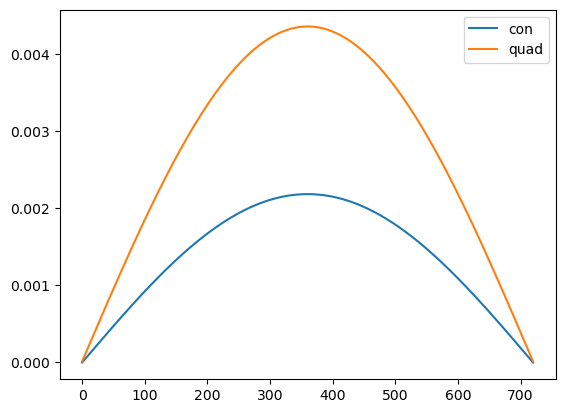

In [77]:
plt.plot(con,label='con')
plt.plot(quad,label='quad')
plt.legend()